# **Loan Default Prediction**
---

Assuming customer's credit history, income-to-loan ratio, and prior defaults are strong indicators of whether they will default on a loan.

This project aims to test:
- Whether past defaults significantly increase the risk of future default
- How demographic and financial variables (education, income, employment) correlate with default risk

>#### **Importing Libraries**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

>#### **Loading & Data Preprocessing**

In [3]:
df = pd.read_csv("Dataset\loan_Approval.csv", encoding_errors = 'ignore')
df.shape

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\sheel\AppData\Local\Temp\ipykernel_32132\2977422635.py:1: SyntaxWarning: invalid escape sequence '\l'
  df = pd.read_csv("Dataset\loan_Approval.csv", encoding_errors = 'ignore')


(45000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             45000 non-null  int64  
 1   Gender                          45000 non-null  object 
 2   Education                       45000 non-null  object 
 3   Income                          45000 non-null  float64
 4   emp_experience                  45000 non-null  int64  
 5   Home_ownership                  45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.head()

,Age,Gender,Education,Income,emp_experience,Home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [7]:
X = df.drop('loan_status', axis = 1)
Y = df['loan_status']

In [8]:
num_cols = ['Age', 'Income', 'emp_experience', 'loan_amnt', 'loan_int_rate',
            'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

cat_cols = [ 'Gender', 'Education',  'Home_ownership', 'loan_intent', 
            'previous_loan_defaults_on_file']

In [9]:
num_transformer = Pipeline(
    steps = [('imputer', SimpleImputer(strategy = 'median')),
             ('scaler', StandardScaler())]
)

cat_transformer = Pipeline(
    steps = [("imputer", SimpleImputer(strategy = 'most_frequent')),
             ("encoder", OneHotEncoder(drop='first'))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)


>#### **Building Model**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [11]:
# Splitting of dataset
X_train, x_test, Y_train, y_test = train_test_split(X,Y, random_state=42, train_size=0.3)

>#### Random Forest Classifier

In [12]:
rfc = RandomForestClassifier(class_weight='balanced', random_state=40)

model_rfc = Pipeline(
    steps = [('preprocessor', preprocessor),
             ('classifier', rfc)]
)

In [13]:
model_rfc.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'emp_experience',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender', 'Education',
                                                   'Home_ownership',
                                                   'loan_intent',
                                                   'previous_loan_defaults_on_file'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=40))])

In [14]:
y_pred = model_rfc.predict(x_test)
y_proba = model_rfc.predict_proba(x_test)[:,1]

>##### Model Evaluation

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

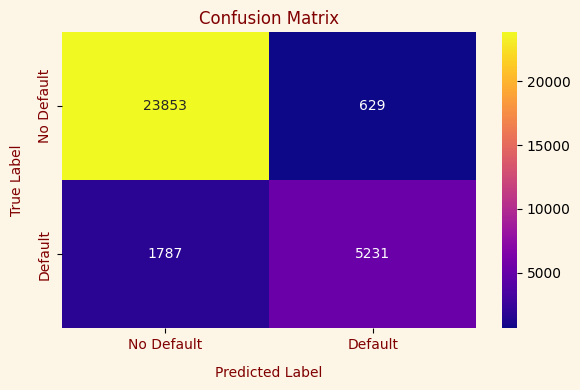

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.facecolor'] = 'oldlace'


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted Label', labelpad=10, color = 'Maroon')
plt.ylabel('True Label', labelpad=10, color = 'Maroon')
plt.title('Confusion Matrix', color = 'Maroon')
plt.tick_params(axis = 'both', labelcolor = 'Maroon')
plt.tight_layout()
plt.show()

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     24482
           1       0.89      0.75      0.81      7018

    accuracy                           0.92     31500
   macro avg       0.91      0.86      0.88     31500
weighted avg       0.92      0.92      0.92     31500



In [18]:
print("ROC AUC Score: ", roc_auc_score(y_test, y_proba))

ROC AUC Score:  0.9695287409557493


>#### XGBOOST

In [19]:
from xgboost import XGBClassifier

In [20]:
xgb = XGBClassifier(n_estimators = 100, max_depth = 4, learning_rate = 0.1, eval_metric = 'logloss')

model_xgb = Pipeline(
    steps = [('preprocessor', preprocessor),
             ('classifier', xgb)]
)

In [21]:
model_xgb.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Income',
                                                   'emp_experience',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='m...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [22]:
y1_pred = model_xgb.predict(x_test)
y1_proba = model_xgb.predict_proba(x_test)[:,1]

>#### Model Evaluation

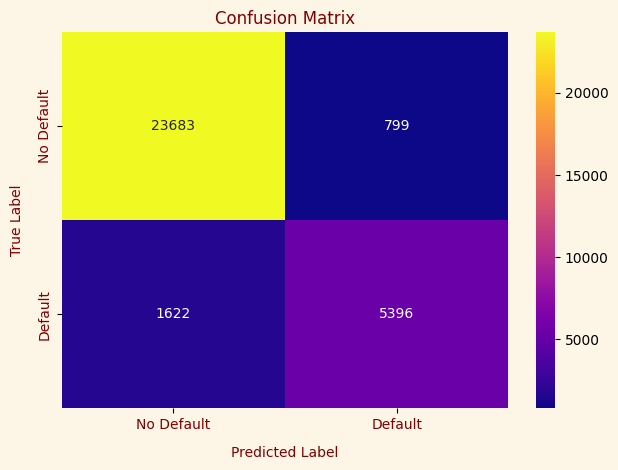

In [23]:
cm1 = confusion_matrix(y_test, y1_pred)

plt.rcParams['figure.facecolor'] = 'oldlace'


sns.heatmap(cm1, annot = True, fmt='d', cmap = 'plasma', xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title("Confusion Matrix", color = 'Maroon')
plt.xlabel("Predicted Label", color = 'Maroon', labelpad=10)
plt.ylabel("True Label", color = 'Maroon', labelpad=10)
plt.tick_params(axis = 'both', labelcolor = 'Maroon')
plt.tight_layout()
plt.show()

In [24]:
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     24482
           1       0.87      0.77      0.82      7018

    accuracy                           0.92     31500
   macro avg       0.90      0.87      0.88     31500
weighted avg       0.92      0.92      0.92     31500



In [25]:
print(roc_auc_score(y_test, y1_proba))

0.9710016040771744


>#### **Feature Importance**

In [26]:
importances = model_xgb.named_steps['classifier'].feature_importances_
feature_names = model_xgb.named_steps['preprocessor'].transformers_[0][2] + \
                list(model_xgb.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(cat_cols))

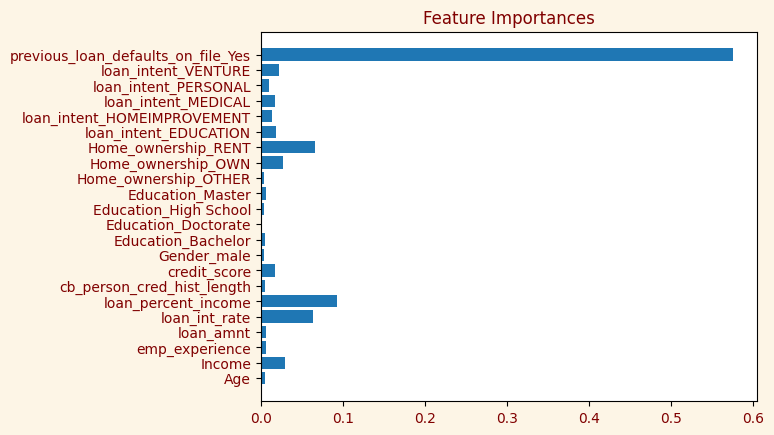

In [27]:
plt.rcParams['figure.facecolor'] = 'oldlace'

plt.barh(feature_names, importances)
plt.title("Feature Importances", color = 'Maroon')
plt.tick_params(axis = 'both', labelcolor='Maroon')
plt.show()

>#### **Save the model**

In [28]:
# Save the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)

### **Conclusion**
---

- Feature like `previos loan defaults on file`, `loan percent income`, and `loan interest rate` plays a major role in determinig the loan defaulters
- XGBoost performs better than Random Forest classifier
